<a href="https://colab.research.google.com/github/stories-of-life/COVID19-india/blob/develop/covid19_india_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch data from Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!mkdir ~/.kaggle
!cp '/content/gdrive/My Drive/kaggle.json' ~/.kaggle
drive.flush_and_unmount()
!ls ~/.kaggle
!kaggle datasets download -d sudalairajkumar/covid19-in-india

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
kaggle.json
  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 32.5MB/s]


In [2]:
!wget http://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
!wget https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_IND_shp.zip
!unzip covid19-in-india.zip -d covid19-in-india
!unzip IND_adm.zip -d IND_adm
!unzip gadm36_IND_shp.zip -d gadm36_IND_shp

--2020-04-15 06:05:30--  http://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip [following]
--2020-04-15 06:05:30--  https://biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip [following]
--2020-04-15 06:05:31--  https://data.biogeo.ucdavis.edu/data/diva/adm/IND_adm.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14925870 (14M) [application/

# Data Processing

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
india_covid19_data=pd.read_csv('covid19-in-india/covid_19_india.csv')
print(india_covid19_data.shape)
print(india_covid19_data.columns)
india_covid19_data.tail()

(959, 9)
Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
954,955,14/04/20,5:00 PM,Telengana,-,-,100,17,624
955,956,14/04/20,5:00 PM,Tripura,-,-,0,0,2
956,957,14/04/20,5:00 PM,Uttarakhand,-,-,7,0,35
957,958,14/04/20,5:00 PM,Uttar Pradesh,-,-,49,5,657
958,959,14/04/20,5:00 PM,West Bengal,-,-,36,7,190


In [9]:
india_covid19_data.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [0]:
india_covid19_data['Date']=pd.to_datetime(india_covid19_data['Date'],dayfirst=True)

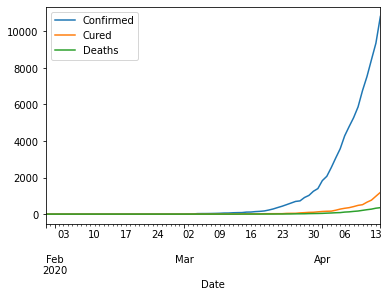

In [8]:
india_covid19_data.groupby(['Date']).sum().reset_index().plot(x='Date',y=['Confirmed','Cured','Deaths'])

# India Map

In [10]:
!pip install pyshp geopandas

     |████████████████████████████████| 225kB 2.8MB/s 
     |████████████████████████████████| 931kB 8.3MB/s 
     |████████████████████████████████| 1.4MB 19.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.7MB 304kB/s 
     |████████████████████████████████| 10.4MB 48.9MB/s 
     |████████████████████████████████| 18.1MB 173kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.1-cp36-none-any.whl size=1365034 sha256=e8461e0a6cc8d604f61a59b095c3a22c3b5e13e8f9848bc8e8b3182f1e131dbb
  Stored in directory: /root/.cache/pip/wheels/19/73/bc/a463e618369ee186e5427252daabcda420b04be3644b2df40f
Successfully built earthpy
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=2b68d70fe3b67f266d441a1a6ceb26720a8e1d453564b769b865af260e0e4df9
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba

In [0]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd

In [13]:
india_map_data = gpd.read_file('IND_adm/IND_adm1.shp')
print(india_map_data.shape)
india_map_data.head()

(36, 10)


,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,State,State,None,None,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [14]:
india_map_data2 = gpd.read_file('gadm36_IND_shp/gadm36_IND_1.shp')
print(india_map_data2.shape)
india_map_data2.head()

(36, 11)


,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,Union Territor,Union Territory,None,IN.AN,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.2_1,Andhra Pradesh,None,None,State,State,None,IN.AP,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13..."
2,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,None,State,State,None,IN.AR,"POLYGON ((94.21111 27.61084, 94.21351 27.60442..."
3,IND,India,IND.4_1,Assam,None,None,State,State,None,IN.AS,"POLYGON ((89.83875 25.96647, 89.83814 25.96793..."
4,IND,India,IND.5_1,Bihar,None,None,State,State,None,IN.BR,"MULTIPOLYGON (((87.26292 27.85072, 87.25249 27..."


In [18]:
print(india_map_data.isna().sum())
print(india_map_data2.isna().sum())

ID_0          0
ISO           0
NAME_0        0
ID_1          0
NAME_1        0
TYPE_1        0
ENGTYPE_1     0
NL_NAME_1    36
VARNAME_1    22
geometry      0
dtype: int64
GID_0         0
NAME_0        0
GID_1         0
NAME_1        0
VARNAME_1    22
NL_NAME_1    36
TYPE_1        0
ENGTYPE_1     0
CC_1         36
HASC_1        0
geometry      0
dtype: int64


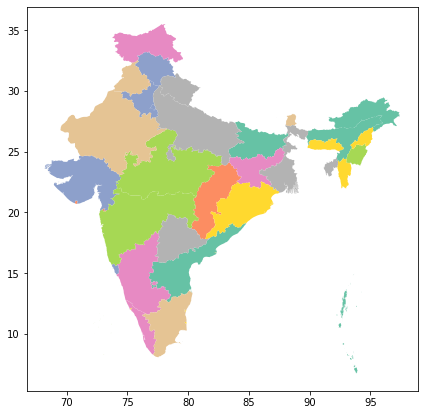

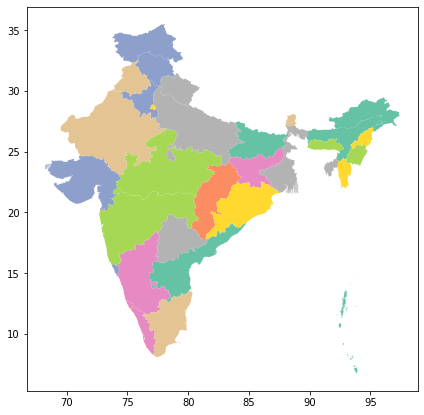

In [17]:
india_map_data.plot(column='NAME_1',categorical=True,figsize=(7,12),cmap='Set2')
india_map_data2.plot(column='NAME_1',categorical=True,figsize=(7,12),cmap='Set2')

# Merging covid and map data

In [24]:
print(india_map_data.groupby(['ENGTYPE_1','NAME_1']).count())
print(india_map_data2.groupby(['TYPE_1','NAME_1']).count())

                                        ID_0  ISO  ...  VARNAME_1  geometry
ENGTYPE_1       NAME_1                             ...                     
State           Andhra Pradesh             1    1  ...          0         1
                Arunachal Pradesh          1    1  ...          1         1
                Assam                      1    1  ...          0         1
                Bihar                      1    1  ...          0         1
                Chhattisgarh               1    1  ...          0         1
                Goa                        1    1  ...          1         1
                Gujarat                    1    1  ...          1         1
                Haryana                    1    1  ...          0         1
                Jammu and Kashmir          1    1  ...          0         1
                Jharkhand                  1    1  ...          1         1
                Karnataka                  1    1  ...          1         1
            

In [25]:
print(india_covid19_data.shape)
print(india_map_data.shape)

(959, 9)
(36, 10)


In [26]:
print(india_covid19_data.columns)
print(india_map_data.columns)

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')
Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1',
       'NL_NAME_1', 'VARNAME_1', 'geometry'],
      dtype='object')


In [27]:
states_covid19_data=np.sort(india_covid19_data['State/UnionTerritory'].unique())
print(states_covid19_data)
print(states_covid19_data.shape)

print(np.sort(india_map_data['NAME_1']))
print(india_map_data['NAME_1'].shape)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan'
 'Tamil Nadu' 'Telengana' 'Tripura' 'Unassigned' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
(34,)
['Andaman and Nicobar' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Orissa' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttaranchal' 'West Bengal']
(36,)


In [28]:
state_id_dict={row['NAME_1']:row['ID_1'] for index,row in india_map_data.iterrows()}
state_id_dict['Andaman and Nicobar Islands']=state_id_dict['Andaman and Nicobar']
state_id_dict['Uttarakhand']=state_id_dict['Uttaranchal']
state_id_dict['Telengana']=state_id_dict['Telangana']
state_id_dict['Odisha']=state_id_dict['Orissa']
state_id_dict['Ladakh']=state_id_dict['Jammu and Kashmir']

print(len(state_id_dict))
state_id_dict

41


{'Andaman and Nicobar': 1,
 'Andaman and Nicobar Islands': 1,
 'Andhra Pradesh': 2,
 'Arunachal Pradesh': 3,
 'Assam': 4,
 'Bihar': 5,
 'Chandigarh': 6,
 'Chhattisgarh': 7,
 'Dadra and Nagar Haveli': 8,
 'Daman and Diu': 9,
 'Delhi': 10,
 'Goa': 11,
 'Gujarat': 12,
 'Haryana': 13,
 'Himachal Pradesh': 14,
 'Jammu and Kashmir': 15,
 'Jharkhand': 16,
 'Karnataka': 17,
 'Kerala': 18,
 'Ladakh': 15,
 'Lakshadweep': 19,
 'Madhya Pradesh': 20,
 'Maharashtra': 21,
 'Manipur': 22,
 'Meghalaya': 23,
 'Mizoram': 24,
 'Nagaland': 25,
 'Odisha': 26,
 'Orissa': 26,
 'Puducherry': 27,
 'Punjab': 28,
 'Rajasthan': 29,
 'Sikkim': 30,
 'Tamil Nadu': 31,
 'Telangana': 32,
 'Telengana': 32,
 'Tripura': 33,
 'Uttar Pradesh': 34,
 'Uttarakhand': 35,
 'Uttaranchal': 35,
 'West Bengal': 36}

In [29]:
india_covid19_data['state_id']=india_covid19_data['State/UnionTerritory'].map(state_id_dict)
india_covid19_data.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
state_id                    3
dtype: int64

In [30]:
india_covid19_data[india_covid19_data['state_id'].isna()]['State/UnionTerritory'].value_counts()

Unassigned    3
Name: State/UnionTerritory, dtype: int64

In [31]:
india_covid19_data.groupby('State/UnionTerritory').mean()['state_id']

State/UnionTerritory
Andaman and Nicobar Islands     1.0
Andhra Pradesh                  2.0
Arunachal Pradesh               3.0
Assam                           4.0
Bihar                           5.0
Chandigarh                      6.0
Chhattisgarh                    7.0
Delhi                          10.0
Goa                            11.0
Gujarat                        12.0
Haryana                        13.0
Himachal Pradesh               14.0
Jammu and Kashmir              15.0
Jharkhand                      16.0
Karnataka                      17.0
Kerala                         18.0
Ladakh                         15.0
Madhya Pradesh                 20.0
Maharashtra                    21.0
Manipur                        22.0
Meghalaya                      23.0
Mizoram                        24.0
Nagaland                       25.0
Odisha                         26.0
Puducherry                     27.0
Punjab                         28.0
Rajasthan                      29.0
Tamil N

In [120]:
india_covid19_data.dropna(inplace=True)
print(india_covid19_data.groupby('State/UnionTerritory').mean()['state_id'])
print(f"States with NA state_id: {india_covid19_data[india_covid19_data['state_id'].isna()]['State/UnionTerritory'].value_counts()}")

State/UnionTerritory
Andaman and Nicobar Islands     1.0
Andhra Pradesh                  2.0
Arunachal Pradesh               3.0
Assam                           4.0
Bihar                           5.0
Chandigarh                      6.0
Chhattisgarh                    7.0
Delhi                          10.0
Goa                            11.0
Gujarat                        12.0
Haryana                        13.0
Himachal Pradesh               14.0
Jammu and Kashmir              15.0
Jharkhand                      16.0
Karnataka                      17.0
Kerala                         18.0
Ladakh                         15.0
Madhya Pradesh                 20.0
Maharashtra                    21.0
Manipur                        22.0
Meghalaya                      23.0
Mizoram                        24.0
Nagaland                       25.0
Odisha                         26.0
Puducherry                     27.0
Punjab                         28.0
Rajasthan                      29.0
Tamil N

In [0]:
india_covid19_data['state_id']=india_covid19_data['state_id'].apply(int)

In [131]:
gb=india_covid19_data.groupby(['State/UnionTerritory','Date']).sum()
state_index=gb.index.levels[0]
covid19_data_for_map=pd.DataFrame(columns=gb.reset_index(level='State/UnionTerritory').columns)
for state in state_index:
  last_date=gb.loc[state].index[-1]
  df=gb.loc[state,last_date,:]
  covid19_data_for_map=pd.concat([covid19_data_for_map,df.reset_index()],ignore_index=True)
covid19_data_for_map

,State/UnionTerritory,Sno,Cured,Deaths,Confirmed,state_id,Date
0,Andaman and Nicobar Islands,928,10,0,11,1,2020-04-14
1,Andhra Pradesh,927,14,9,473,2,2020-04-14
2,Arunachal Pradesh,929,0,0,1,3,2020-04-14
3,Assam,930,0,1,31,4,2020-04-14
4,Bihar,931,26,1,66,5,2020-04-14
5,Chandigarh,932,7,0,21,6,2020-04-14
6,Chhattisgarh,933,10,0,31,7,2020-04-14
7,Delhi,934,30,28,1510,10,2020-04-14
8,Goa,935,5,0,7,11,2020-04-14
9,Gujarat,936,55,26,617,12,2020-04-14


In [133]:
india_covid19_data.groupby(['Date','State/UnionTerritory']).sum().loc['2020-04-14'].reset_index().head()

,Date,State/UnionTerritory,Sno,Cured,Deaths,Confirmed,state_id
0,2020-04-14,Andaman and Nicobar Islands,928,10,0,11,1
1,2020-04-14,Andhra Pradesh,927,14,9,473,2
2,2020-04-14,Arunachal Pradesh,929,0,0,1,3
3,2020-04-14,Assam,930,0,1,31,4
4,2020-04-14,Bihar,931,26,1,66,5


In [141]:
merged_map_data=pd.merge(india_map_data,covid19_data_for_map,how='left',left_on='ID_1',right_on='state_id')
merged_map_data

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,State/UnionTerritory,Sno,Cured,Deaths,Confirmed,state_id,Date
0,105,IND,India,1,Andaman and Nicobar,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",Andaman and Nicobar Islands,928,10,0,11,1,2020-04-14
1,105,IND,India,2,Andhra Pradesh,State,State,None,None,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",Andhra Pradesh,927,14,9,473,2,2020-04-14
2,105,IND,India,3,Arunachal Pradesh,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",Arunachal Pradesh,929,0,0,1,3,2020-04-14
3,105,IND,India,4,Assam,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",Assam,930,0,1,31,4,2020-04-14
4,105,IND,India,5,Bihar,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",Bihar,931,26,1,66,5,2020-04-14
5,105,IND,India,6,Chandigarh,Union Territor,Union Territory,None,None,"POLYGON ((76.80293 30.67548, 76.79437 30.66932...",Chandigarh,932,7,0,21,6,2020-04-14
6,105,IND,India,7,Chhattisgarh,State,State,None,None,"POLYGON ((83.32760 24.09965, 83.34575 24.09707...",Chhattisgarh,933,10,0,31,7,2020-04-14
7,105,IND,India,8,Dadra and Nagar Haveli,Union Territor,Union Territory,None,DAdra et Nagar Haveli|Dadra e Nagar Haveli,"POLYGON ((73.02468 20.09630, 73.01955 20.10502...",NaN,NaN,NaN,NaN,NaN,NaN,NaT
8,105,IND,India,9,Daman and Diu,Union Territor,Union Territory,None,None,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20...",NaN,NaN,NaN,NaN,NaN,NaN,NaT
9,105,IND,India,10,Delhi,Union Territor,Union Territory,None,None,"POLYGON ((77.32713 28.68516, 77.32539 28.68250...",Delhi,934,30,28,1510,10,2020-04-14


In [142]:
merged_map_data.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1',
       'NL_NAME_1', 'VARNAME_1', 'geometry', 'State/UnionTerritory', 'Sno',
       'Cured', 'Deaths', 'Confirmed', 'state_id', 'Date'],
      dtype='object')

In [0]:
merged_map_data=merged_map_data.astype({'Cured':np.float, 'Deaths':np.float, 'Confirmed':np.float})

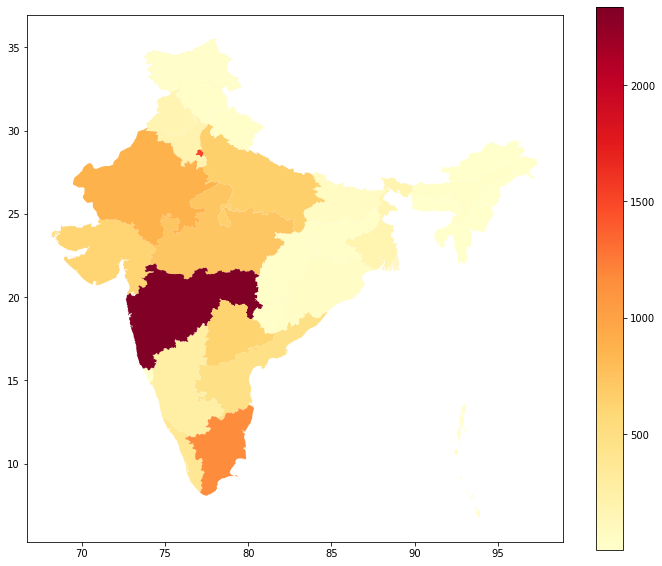

In [164]:
merged_map_data.plot(column='Confirmed',categorical=False,figsize=(12,10),cmap='YlOrRd',legend=True)

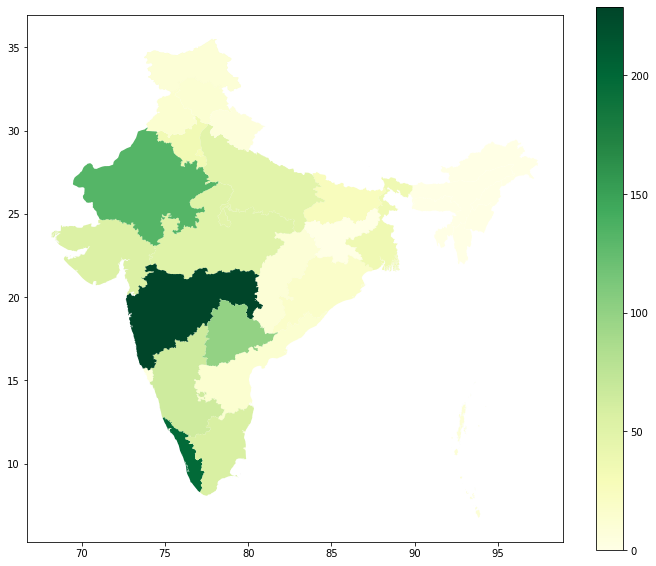

In [166]:
merged_map_data.plot(column='Cured',categorical=False,figsize=(12,10),cmap='YlGn',legend=True)

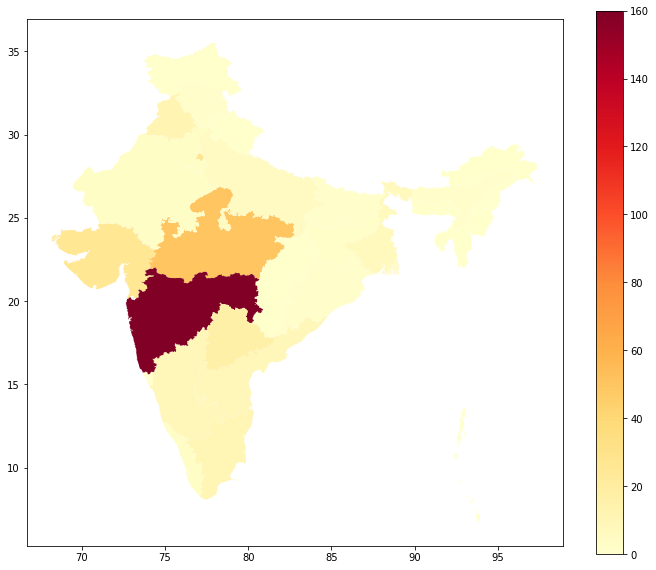

In [168]:
merged_map_data.plot(column='Deaths',categorical=False,figsize=(12,10),cmap='YlOrRd',legend=True)

# PLOT-1a NUMBER OF CASES IN INDIA (DAILY AND CUMULATIVE)

In [172]:
print(india_covid19_data.shape)
india_covid19_data.head()

(956, 10)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,state_id
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,18
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,18
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,18
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,18
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,18


In [180]:
gb=india_covid19_data.groupby('Date').sum()
gb

,Sno,Cured,Deaths,Confirmed,state_id
Date,,,,,
2020-01-30,1,0,0,1,18
2020-01-31,2,0,0,1,18
2020-02-01,3,0,0,2,18
2020-02-02,4,0,0,3,18
2020-02-03,5,0,0,3,18
...,...,...,...,...,...
2020-04-10,25327,516,206,6761,567
2020-04-11,26288,653,242,7529,567
2020-04-12,27249,765,273,8447,567


Text(0.5, 1.0, 'Cummulative')

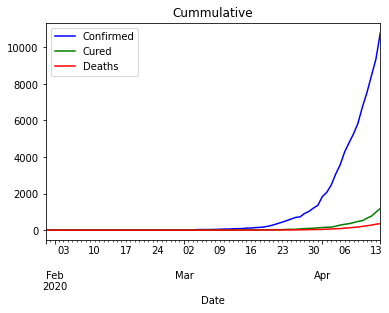

In [200]:
gb.plot(y=['Confirmed','Cured','Deaths'],color=['b','g','r'])
plt.title('Cummulative')

Text(0.5, 1.0, 'Cummulative')

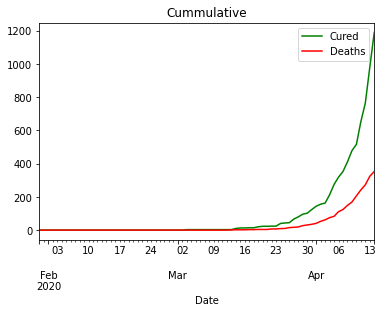

In [201]:
gb.plot(y=['Cured','Deaths'],color=['g','r'])
plt.title('Cummulative')

Text(0.5, 1.0, 'Daily')

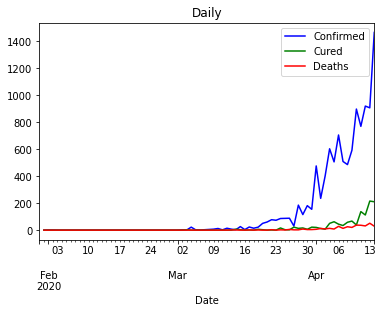

In [202]:
gb.diff().plot(y=['Confirmed','Cured','Deaths'],color=['b','g','r'])
plt.title('Daily')

Text(0.5, 1.0, 'Daily')

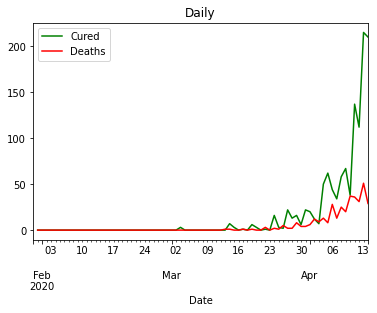

In [203]:
gb.diff().plot(y=['Cured','Deaths'],color = ['g', 'r'])
plt.title('Daily')

(array([737456., 737470., 737485., 737499., 737516., 737530.]),
 <a list of 6 Text major ticklabel objects>)

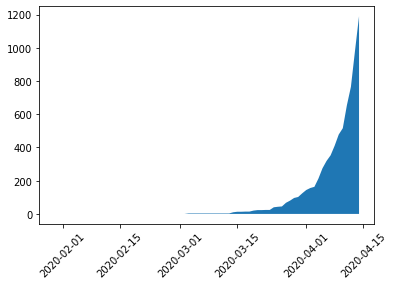

In [207]:
plt.fill_between(gb.index,gb['Cured'],0)
plt.xticks(rotation=45)

AttributeError: ignored